#### 隨機產生args....!!!

In [1]:
import os 
from time import time
from random import uniform

import pandas as pd 
import numpy  as np 
import torch
import matplotlib.pyplot as plt 

from tqdm import tqdm

from utils import load_mch
from utils.mch import MCHHandler

# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
wl = [i for i in range(660, 921, 10)]
%matplotlib inline

In [2]:
x_range = {
    "idx": None,
    "skin_b": (0.0012, 0.0041),
    "skin_s": (0.985, 1.0),
    "skin_w": (0.166, 0.261),
    "skin_f": (0.187, 0.277),
    "skin_m": (0.0087, 0.0165),

    "fat_f": (0.5, 1),

    "muscle_b": (0.005, 0.050),
    "muscle_s": (0.5, 0.9),
    "muscle_w": (0.5, 0.9),

    "ijv_s": (0.0, 1.0),

    "cca_s": (0.0, 1.0),
}
x_range = {
    "idx": None,
    "sb": (0, 0.1),
    "ss": (0.9, 1.0),
    "sw": (0, 0.5),
    "sf": (0, 0.5),
    "sm": (0, 0.5),

    "ff": (1, 1),

    "mb": (0.005, 0.1),
    "ms": (0.0, 1.0),
    "mw": (0.0, 1.0),

    "is": (0.4, 0.8),

    "cs": (0.85, 1.0),
}

In [3]:
def get_args(xrange, num=50000):
    args = []
    for i in range(num):
        sb = uniform(x_range["sb"][0], x_range["sb"][1])
        ss = uniform(x_range["ss"][0], x_range["ss"][1])
        sw = uniform(x_range["sw"][0], max(x_range["sw"][0], min(x_range["sw"][1], 1-sb)))
        sf = uniform(x_range["sf"][0], max(x_range["sf"][0], min(x_range["sf"][1], 1-sb-sw)))
        sm = 1-sb-sw-sf
        mb = uniform(x_range["mb"][0], x_range["mb"][1])
        ms = uniform(x_range["ms"][0], x_range["ms"][1])
        mw = uniform(x_range["mw"][0], max(x_range["mw"][0], min(x_range["mw"][1], 1-mb)))
        mc = 1 - mb - mw
        is_ = uniform(x_range["is"][0], x_range["is"][1])
        cs = uniform(x_range["cs"][0], x_range["cs"][1])
        arg = {
            "skin":{
                "blood_volume_fraction": sb,
                "ScvO2": ss,
                "water_volume": sw,
                "fat_volume": sf,
                "melanin_volume": sm,
                "collagen_colume": 0
            },

            "fat":{
                "blood_volume_fraction": 0,
                "ScvO2": 0,
                "water_volume": 0,
                "fat_volume": 1,
                "melanin_volume": 0,
                "collagen_colume": 0
            },

            "muscle":{
                "blood_volume_fraction": mb,
                "ScvO2": ms,
                "water_volume": mw,
                "fat_volume": 0,
                "melanin_volume": 0,
                "collagen_colume": mc
            },
            "ijv":{
                "blood_volume_fraction": 1,
                "ScvO2": is_,
                "water_volume": 0,
                "fat_volume": 0,
                "melanin_volume": 0,
                "collagen_colume": 0
            },
            "cca":{
                "blood_volume_fraction": 1,
                "ScvO2": cs,
                "water_volume": 0,
                "fat_volume": 0,
                "melanin_volume": 0,
                "collagen_colume": 0
            },
        }
        args += [arg]
    
    return args

args = get_args(x_range)

#### 跑WMC!!

In [4]:
idx = "20190507"
idx = os.path.join("configs", "live", idx)
max_no_prism = idx + "_max" + "_no_prism" + ".json"
max_prism = idx + "_max" + ".json"
min_no_prism = idx + "_min" + "_no_prism" + ".json"
min_prism = idx + "_min" + ".json"

In [5]:
mch = MCHHandler()

In [20]:
# mch.load_config(max_no_prism)
# s_max, r_max = mch.run_wmc(args)

In [51]:
mch.load_config(min_no_prism)
s_min, r_min = mch.run_wmc(args)

In [44]:
# # mch.mch_list[0]
d, head, _ = mch._load_mch(mch.mch_list[0])
head

In [45]:
d.groupby("detector_idx").mean()

#### 活體光譜

In [46]:
df = pd.read_csv("data/calibrated/20190507/IJV/20190507_1_1.csv")
# df = pd.read_csv("data/calibrated/20190502/IJV/20190502_1_1.csv")
df.head(1)

#### 比較波型和強度

#### 未加凌鏡

num: 0 | loss: 0.8999755215320457


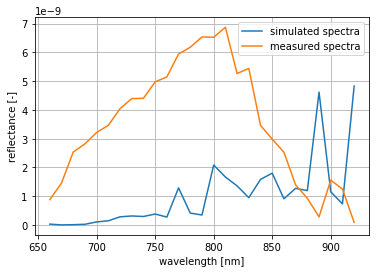

num: 10 | loss: 0.7041315863048672


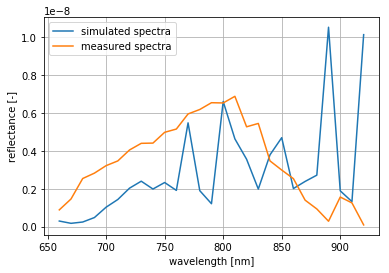

num: 468 | loss: 0.6902831368030033


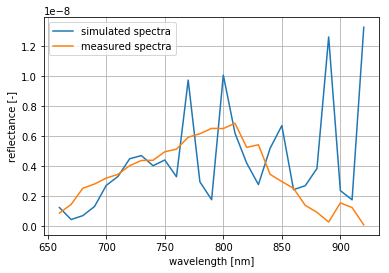

num: 1752 | loss: 0.6855666744860738


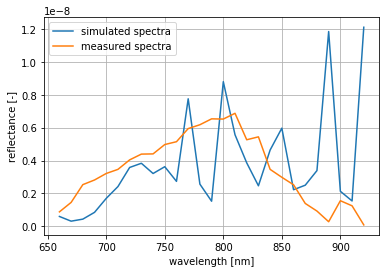

num: 1881 | loss: 0.6380490178268213


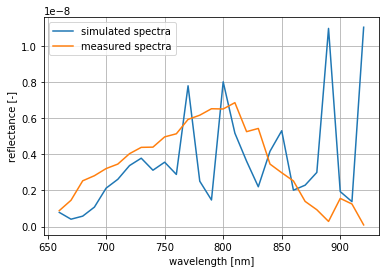

num: 2078 | loss: 0.623774680632985


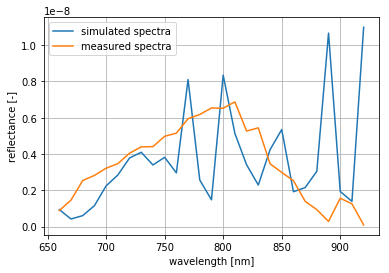

num: 27074 | loss: 0.6085933793665077


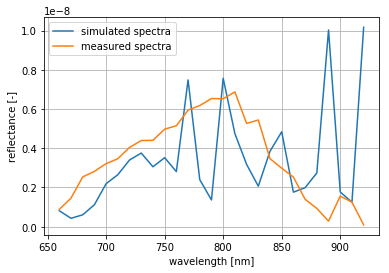

In [52]:
# IJV舒張
loss = 100
for i, s in enumerate(s_min):
    if np.sqrt((s[1,:]-df["max"])**2).mean()/df["max"].mean() < loss:
        loss = np.sqrt((s[1, :] - df["max"])**2).mean()/df["max"].mean()
        print("num: {} | loss: {}".format(i, loss))

        plt.plot(wl, s[1, :], label="simulated spectra") 
        plt.plot(wl, df["max"], label="measured spectra")
        plt.xlabel("wavelength [nm]")
        plt.ylabel("reflectance [-]")
        plt.legend()
        plt.grid()
        plt.show()

In [39]:
# args[19437]

num: 0 | loss: 0.9635194194838237


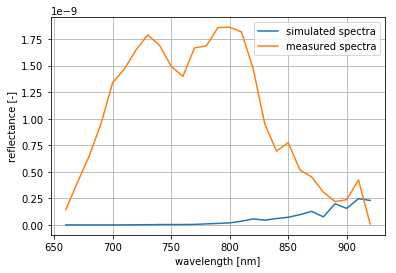

num: 5 | loss: 0.9461141966642669


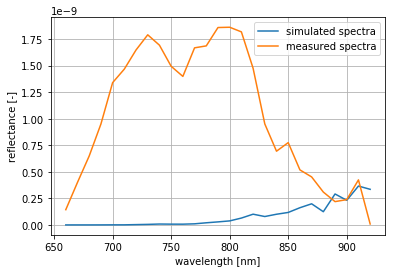

num: 18 | loss: 0.9381685055568015


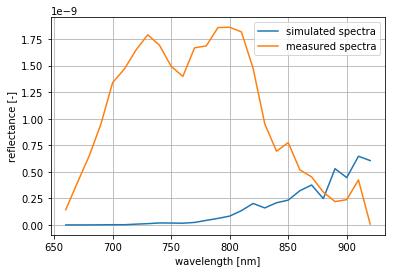

num: 21 | loss: 0.9350452694683197


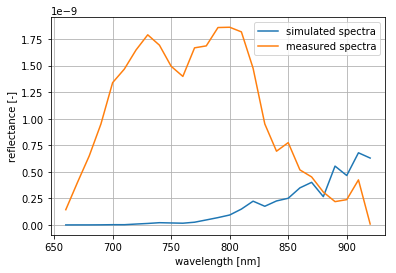

num: 22 | loss: 0.9348777829282423


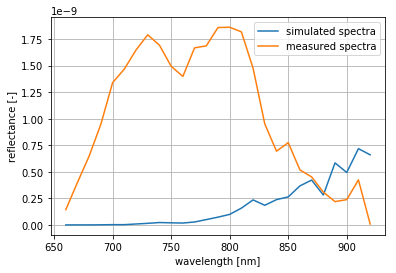

num: 26 | loss: 0.9282157740851251


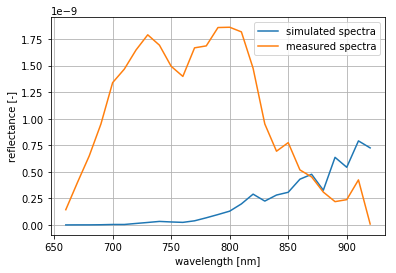

num: 1657 | loss: 0.9280915104941165


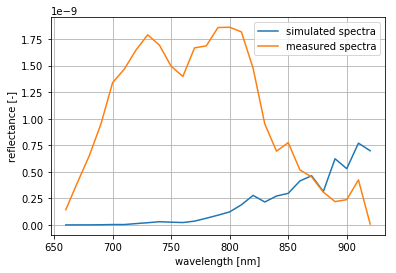

num: 3819 | loss: 0.9265165472926744


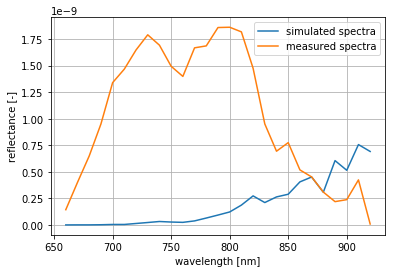

num: 6906 | loss: 0.925500144481583


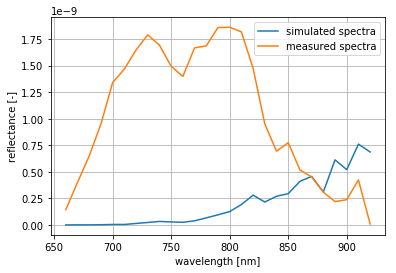

In [16]:
# IJV收縮
loss = 100
for i, s in enumerate(s_max):
    if np.sqrt((s[1,:]-df["min"])**2).mean()/df["min"].mean() < loss:
        
        loss = np.sqrt((s[1, :] - df["min"])**2).mean()/df["min"].mean()
        print("num: {} | loss: {}".format(i, loss))
        
        plt.plot(wl, s[1, :], label="simulated spectra") 
        plt.plot(wl, df["min"], label="measured spectra")
        plt.xlabel("wavelength [nm]")
        plt.ylabel("reflectance [-]")
        plt.legend()
        plt.grid()
        plt.show()

num: 0 | loss: 0.7827952622796575


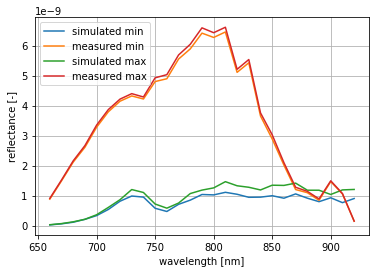

num: 1 | loss: 0.750364279447127


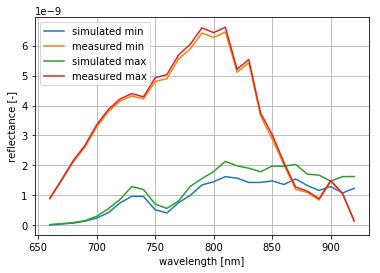

num: 2 | loss: 0.5372284036237347


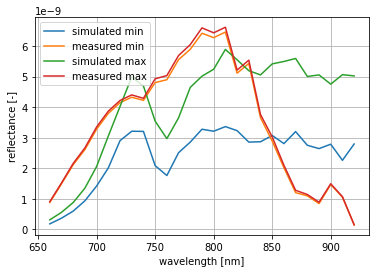

num: 65 | loss: 0.49813501461279586


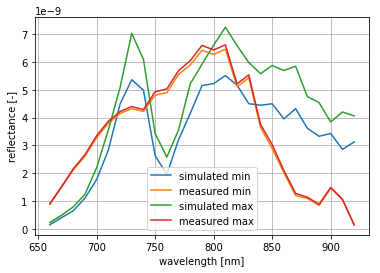

num: 68 | loss: 0.47228202448570955


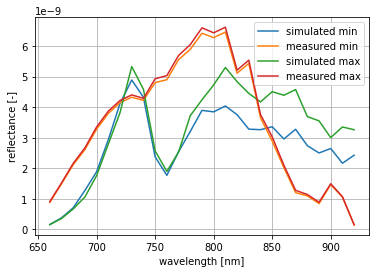

num: 85 | loss: 0.4629630284505286


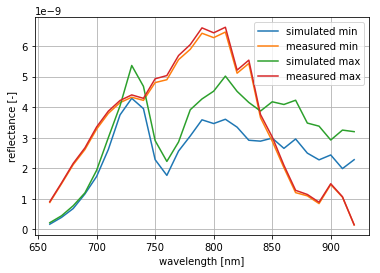

num: 92 | loss: 0.45321458794712577


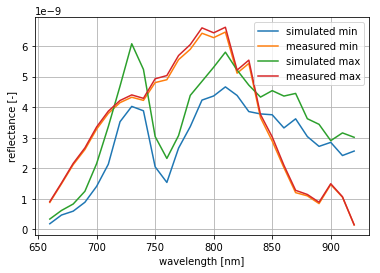

num: 100 | loss: 0.43167718605957756


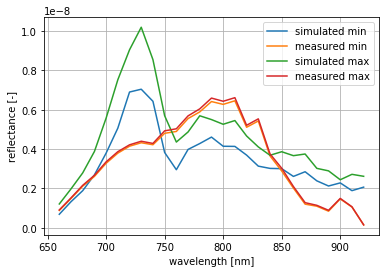

num: 241 | loss: 0.415746747447837


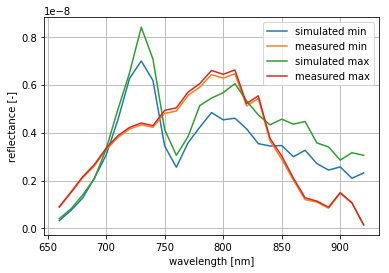

num: 735 | loss: 0.41183924087015256


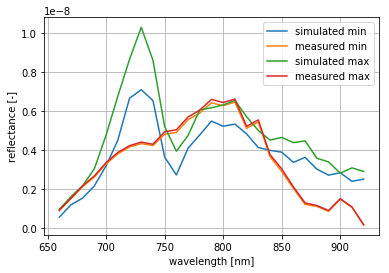

num: 804 | loss: 0.39343421660085187


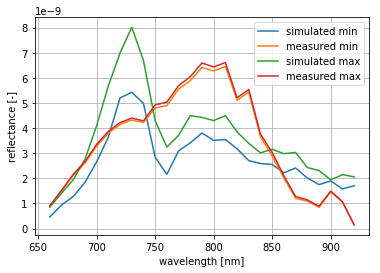

num: 6950 | loss: 0.3919999260775165


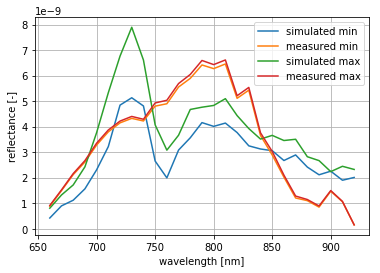

num: 13791 | loss: 0.39152211682113797


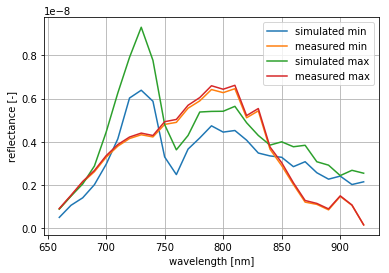

num: 31322 | loss: 0.3911840386797568


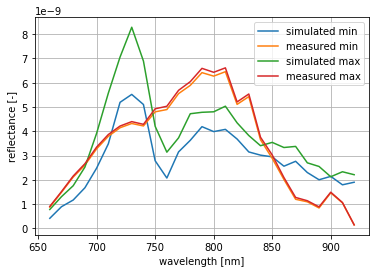

num: 31926 | loss: 0.3904398945606099


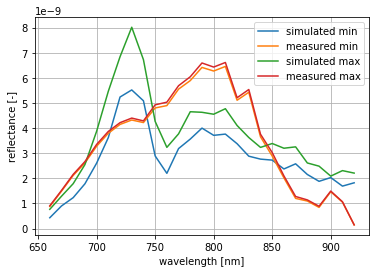

num: 39404 | loss: 0.3895816963585762


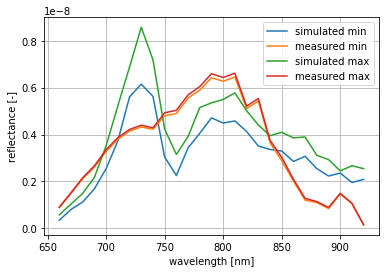

In [116]:
# 一起比較
loss = 100
for i, (smax, smin) in enumerate(zip(s_max, s_min)):
    loss_ = (np.sqrt((smax[1,:]-df["min"])**2).mean()/df["min"].mean() + \
             np.sqrt((smin[1,:]-df["max"])**2).mean()/df["max"].mean()) / 2
    if loss_ < loss:
        
        loss = loss_
        print("num: {} | loss: {}".format(i, loss))
        
        plt.plot(wl, smax[1, :], label="simulated min") 
        plt.plot(wl, df["min"], label="measured min")
        
        plt.plot(wl, smin[1, :], label="simulated max") 
        plt.plot(wl, df["max"], label="measured max")
        
        plt.xlabel("wavelength [nm]")
        plt.ylabel("reflectance [-]")
        plt.legend()
        plt.grid()
        plt.show()

#### 單純比較形狀

1.4725182125807508


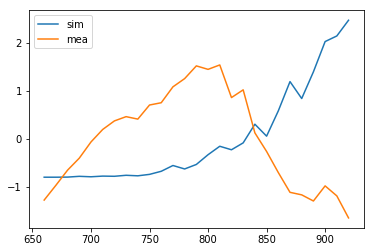

1.4669654700844157


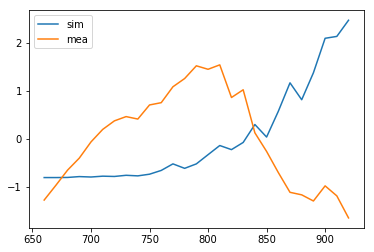

1.4459675554484437


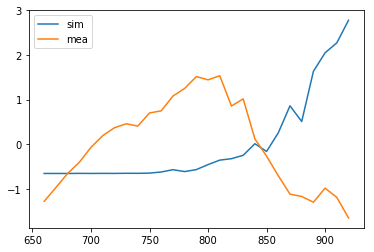

1.4354724408903534


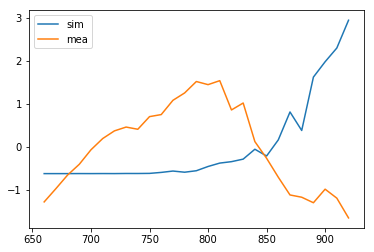

1.4289135428963737


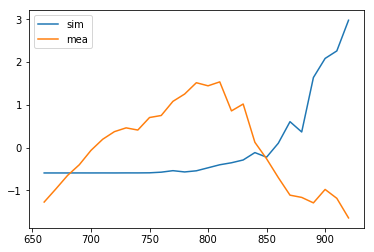

1.4235143498376013


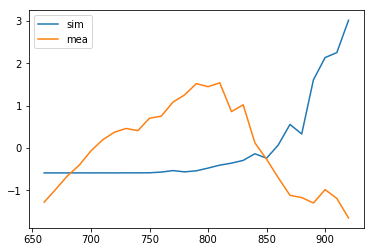

1.4158976490503634


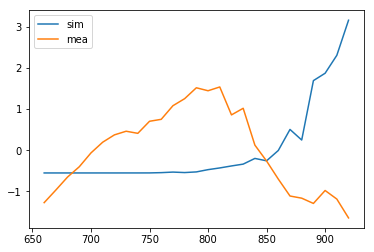

1.393073429471019


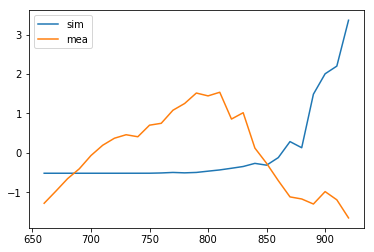

1.3877852471175902


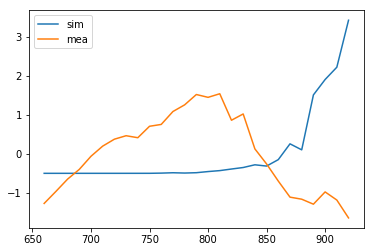

1.3869431215169588


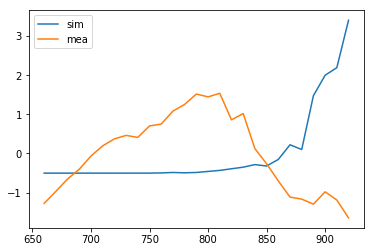

1.3720775630449342


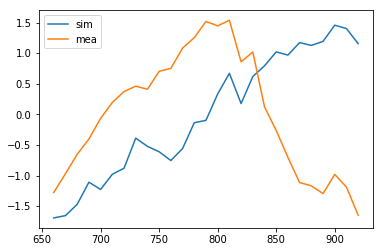

1.3214545663652644


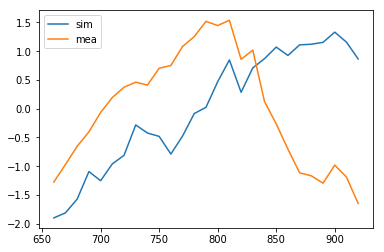

1.311565706807495


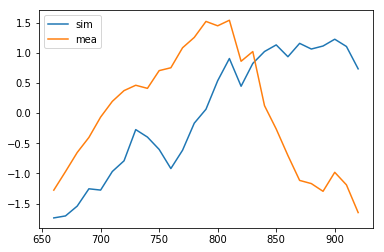

1.3004245039179076


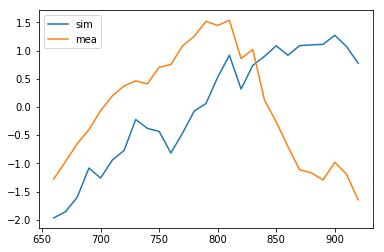

1.2493610922463372


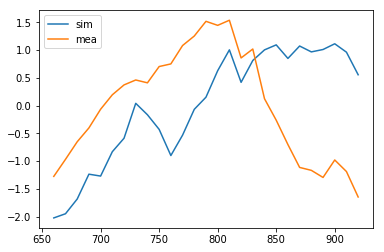

1.187943194616619


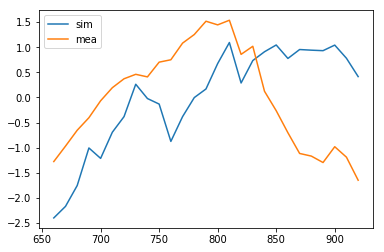

1.1817539967008568


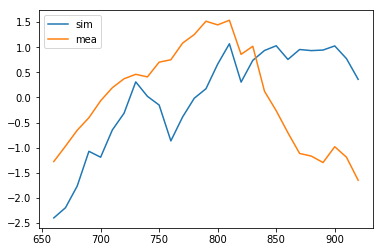

1.1715904243884547


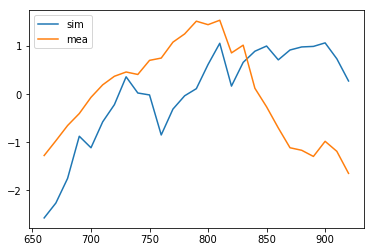

1.1070714045689687


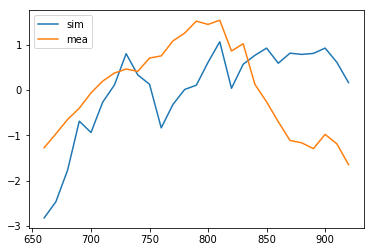

In [21]:
loss = 100
for s in s_max:
    s = (s - np.mean(s, 1, keepdims=True))/np.std(s, 1, keepdims=True)
    m = (df["min"] - df["min"].mean())/df["min"].std()
    if np.sqrt((s[1,:]-m)**2).mean() < loss:
        loss = np.sqrt(((s[1,:]-m))**2).mean()
        print(loss)
        plt.plot(wl, s[1, :], label="sim") 
        plt.plot(wl, m, label="mea")
        plt.legend()
        plt.show()

1.5089376247441695


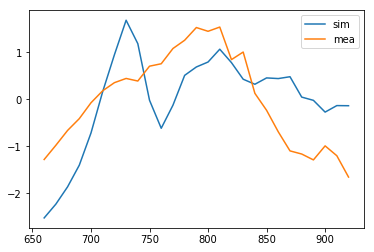

1.1763039576418894


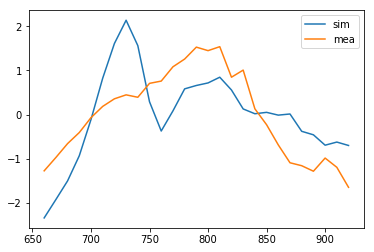

1.105530554630887


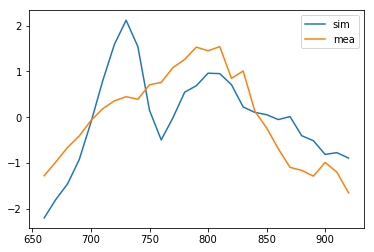

1.1013237426185205


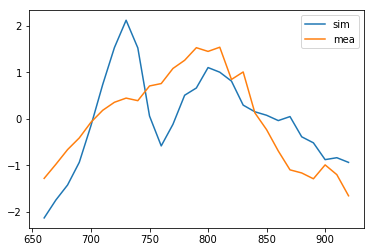

1.0944587794151868


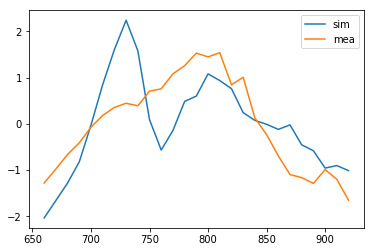

1.0424660563394612


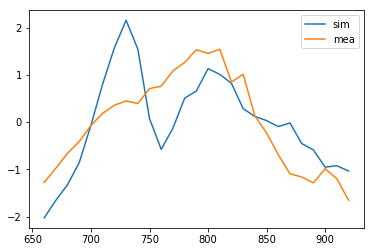

1.0403762848219908


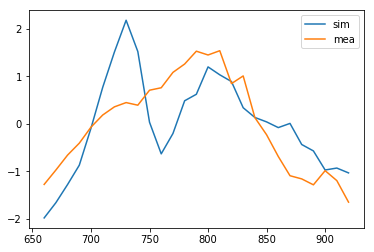

In [158]:
loss = 100
for s in s_min:
    s = (s - np.mean(s, 1, keepdims=True))/np.std(s, 1, keepdims=True)
    m = (df["max"] - df["max"].mean())/df["max"].std()
    if np.sqrt(((s[1,:]-m)/m)**2).mean() < loss:
        loss = np.sqrt(((s[1,:]-m)/m)**2).mean()
        print(loss)
        plt.plot(wl, s[1, :], label="sim") 
        plt.plot(wl, m, label="mea")
        plt.legend()
        plt.show()